In [1]:
import numpy as np 
import pandas as pd 
import datetime
import os
import time
import matplotlib.pyplot as plt
import seaborn as sns
import gc
%matplotlib inline

In [2]:
dtypes = {
        'ip'            : 'uint32',
        'app'           : 'uint16',
        'device'        : 'uint16',
        'os'            : 'uint16',
        'channel'       : 'uint16',
        'is_attributed' : 'uint8',
        }

train = pd.read_csv('../input/train_sample.csv', dtype=dtypes)

#check datatypes:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
ip                 100000 non-null uint32
app                100000 non-null uint16
device             100000 non-null uint16
os                 100000 non-null uint16
channel            100000 non-null uint16
click_time         100000 non-null object
attributed_time    227 non-null object
is_attributed      100000 non-null uint8
dtypes: object(2), uint16(4), uint32(1), uint8(1)
memory usage: 2.8+ MB


In [3]:
train['click_time'] = pd.to_datetime(train['click_time'])
train['attributed_time'] = pd.to_datetime(train['attributed_time'])

train.describe(include='all')

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000,227,100000.000000
unique,NaN,NaN,NaN,NaN,NaN,80350,227,NaN
top,NaN,NaN,NaN,NaN,NaN,2017-11-08 12:01:02,2017-11-09 00:21:23,NaN
freq,NaN,NaN,NaN,NaN,NaN,7,1,NaN
first,NaN,NaN,NaN,NaN,NaN,2017-11-06 16:00:00,2017-11-06 17:19:04,NaN
last,NaN,NaN,NaN,NaN,NaN,2017-11-09 15:59:51,2017-11-09 15:28:15,NaN
mean,91255.879670,12.04788,21.771250,22.818280,268.832460,NaN,NaN,0.002270
std,69835.553661,14.94150,259.667767,55.943136,129.724248,NaN,NaN,0.047591
min,9.000000,1.00000,0.000000,0.000000,3.000000,NaN,NaN,0.000000
25%,40552.000000,3.00000,1.000000,13.000000,145.000000,NaN,NaN,0.000000


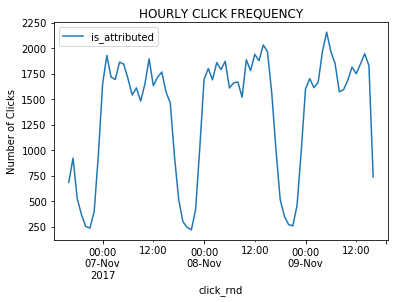

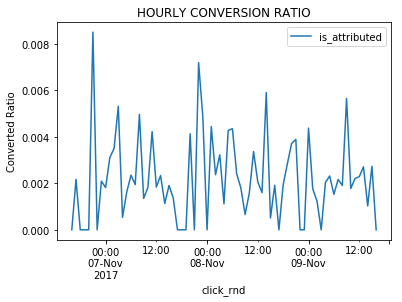

In [4]:
#round the time to nearest hour
train['click_rnd']=train['click_time'].dt.round('H')  

#check for hourly patterns
train[['click_rnd','is_attributed']].groupby(['click_rnd'], as_index=True).count().plot()
plt.title('HOURLY CLICK FREQUENCY');
plt.ylabel('Number of Clicks');

train[['click_rnd','is_attributed']].groupby(['click_rnd'], as_index=True).mean().plot()
plt.title('HOURLY CONVERSION RATIO');
plt.ylabel('Converted Ratio');

In [6]:
lines = 184903891

#generate list of lines to skip
skiplines = np.random.choice(np.arange(1, lines), size=lines-1-1000000, replace=False)

#sort the list
skiplines = np.sort(skiplines)

skiplines.shape

(183903890,)

In [7]:
#check our list
print('lines to skip:', len(skiplines))
print('remaining lines in sample:', lines-len(skiplines), '(remember that it includes the heading!)')

###################SANITY CHECK###################
#find lines that weren't skipped by checking difference between each consecutive line
#how many out of first 100000 will be imported into the csv?
diff = skiplines[1:100000]-skiplines[2:100001]
remain = sum(diff!=-1)
print('Ratio of lines from first 100000 lines:',  '{0:.5f}'.format(remain/100000) ) 
print('Ratio imported from all lines:', '{0:.5f}'.format((lines-len(skiplines))/lines) )

lines to skip: 183903890
remaining lines in sample: 1000001 (remember that it includes the heading!)
Ratio of lines from first 100000 lines: 0.00559
Ratio imported from all lines: 0.00541


In [8]:
train = pd.read_csv('../input/train.csv', skiprows=skiplines, dtype=dtypes)
train.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,83230,3,1,13,379,2017-11-06 14:32:21,NaN,0
1,108881,3,1,13,379,2017-11-06 15:41:58,NaN,0
2,133500,3,1,17,379,2017-11-06 15:58:40,NaN,0
3,124768,2,1,13,435,2017-11-06 16:00:00,NaN,0
4,28223,12,1,17,178,2017-11-06 16:00:01,NaN,0


In [9]:
train['click_time'] = pd.to_datetime(train['click_time'])
train['attributed_time'] = pd.to_datetime(train['attributed_time'])
train.describe(include='all')

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000,2548,1000000.000000
unique,NaN,NaN,NaN,NaN,NaN,234140,2532,NaN
top,NaN,NaN,NaN,NaN,NaN,2017-11-08 15:14:26,2017-11-07 09:02:59,NaN
freq,NaN,NaN,NaN,NaN,NaN,18,2,NaN
first,NaN,NaN,NaN,NaN,NaN,2017-11-06 14:32:21,2017-11-06 16:15:17,NaN
last,NaN,NaN,NaN,NaN,NaN,2017-11-09 16:00:00,2017-11-09 15:59:12,NaN
mean,90889.128314,12.010109,21.704278,22.675788,268.520100,NaN,NaN,0.002548
std,69493.850253,14.698305,258.999052,55.110791,129.509024,NaN,NaN,0.050413
min,6.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000
25%,40289.000000,3.000000,1.000000,13.000000,145.000000,NaN,NaN,0.000000
